## Medical_Cost_Regreession_Problem

Predicting the medical cost based on som independent variables using the [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv) dataset from Kaggle

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preperation

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preprocessing

> We are trying to predict **insurance charges** based on **age, sex, bmi, childen, smoker and region**.

#### We have categorical columns which are:
    * **sex**
    * **smoker**
    * **region**
    * *These columns should be one hot encorded*

#### We also have sparse unscaled columns such as:

    * **age**
    * **bmi**
    * **children**

### Split Features and Labels and data preprocessing

In [3]:
y = insurance["charges"].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
column_transformer = ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), ['age', 'bmi']),
    ('standard_scaler', StandardScaler(), ['children']),
    ('onehot_encoder', OneHotEncoder(), ['smoker', 'region', 'sex'])
])
column_transformer.fit(insurance)

ColumnTransformer(transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['age', 'bmi']),
                                ('standard_scaler', StandardScaler(),
                                 ['children']),
                                ('onehot_encoder', OneHotEncoder(),
                                 ['smoker', 'region', 'sex'])])

In [6]:
X = column_transformer.transform(insurance)

In [7]:
X[:2]

array([[ 0.02173913,  0.3212268 , -0.90861367,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ],
       [ 0.        ,  0.47914985, -0.07876719,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ]])

### Splitting data into train and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [9]:
y_train.dtype

dtype('float64')

### Converting Data to ``tf.tensors``

In [10]:
import tensorflow as tf

In [11]:
X_train_tensors = tf.convert_to_tensor(X_train.astype('float32'))
X_test_tensors = tf.convert_to_tensor(X_test.astype('float32'))

y_train_tensors = tf.convert_to_tensor(y_train.astype('float32'))
y_test_tensors = tf.convert_to_tensor(y_test.astype('float32'))

In [12]:
X_train_tensors, y_train_tensors

(<tf.Tensor: shape=(1070, 11), dtype=float32, numpy=
 array([[ 0.4347826 ,  0.38337368,  1.5809257 , ...,  0.        ,
          1.        ,  0.        ],
        [ 0.7826087 ,  0.63599676, -0.0787672 , ...,  1.        ,
          0.        ,  1.        ],
        [ 0.45652175,  0.45305353, -0.9086137 , ...,  1.        ,
          1.        ,  0.        ],
        ...,
        [ 0.73913044,  0.38310465, -0.0787672 , ...,  1.        ,
          0.        ,  1.        ],
        [ 0.02173913,  0.57761633, -0.9086137 , ...,  0.        ,
          1.        ,  0.        ],
        [ 0.8043478 ,  0.5188324 , -0.0787672 , ...,  0.        ,
          0.        ,  1.        ]], dtype=float32)>,
 <tf.Tensor: shape=(1070,), dtype=float32, numpy=
 array([ 7537.164 , 10450.552 ,  5649.715 , ...,  9724.53  ,  2138.0708,
        11394.065 ], dtype=float32)>)

### Creating a model

In [13]:
from tensorflow import keras

In [14]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1),
])
model.compile(
    optimizer= keras.optimizers.Adam(),
    loss = keras.losses.mae,
    metrics=['mae']
)

In [15]:
EPOCHS = 100
VERBOSE = 1
VALIDATION_SPLIT = .2
BATCH_SIZE = 64

history = model.fit(X_train_tensors, y_train_tensors, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=EPOCHS, validation_split=VALIDATION_SPLIT)

Epoch 1/100
14/14 [==============================] - 3s 129ms/step - loss: 12663.0305 - mae: 12663.0305 - val_loss: 14536.8809 - val_mae: 14536.8809
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 13116.9011 - mae: 13116.9011 - val_loss: 14529.3682 - val_mae: 14529.3682
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 13317.7955 - mae: 13317.7955 - val_loss: 14496.8535 - val_mae: 14496.8535
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 13119.1270 - mae: 13119.1270 - val_loss: 14376.8379 - val_mae: 14376.8379
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 12791.2080 - mae: 12791.2080 - val_loss: 14005.3457 - val_mae: 14005.3457
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 12129.2290 - mae: 12129.2290 - val_loss: 13018.5713 - val_mae: 13018.5713
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 11083.9574 - mae: 11083.9574 - val_loss: 11

Epoch 58/100
14/14 [==============================] - 0s 6ms/step - loss: 3161.6157 - mae: 3161.6157 - val_loss: 3416.9722 - val_mae: 3416.9722
Epoch 59/100
14/14 [==============================] - 0s 6ms/step - loss: 2810.8412 - mae: 2810.8412 - val_loss: 3406.9995 - val_mae: 3406.9995
Epoch 60/100
14/14 [==============================] - 0s 6ms/step - loss: 3185.4162 - mae: 3185.4162 - val_loss: 3407.4019 - val_mae: 3407.4019
Epoch 61/100
14/14 [==============================] - 0s 6ms/step - loss: 2962.5593 - mae: 2962.5593 - val_loss: 3405.1448 - val_mae: 3405.1448
Epoch 62/100
14/14 [==============================] - 0s 6ms/step - loss: 2977.6179 - mae: 2977.6179 - val_loss: 3406.7556 - val_mae: 3406.7556
Epoch 63/100
14/14 [==============================] - 0s 6ms/step - loss: 2885.2007 - mae: 2885.2007 - val_loss: 3410.4736 - val_mae: 3410.4736
Epoch 64/100
14/14 [==============================] - 0s 7ms/step - loss: 3031.5122 - mae: 3031.5122 - val_loss: 3391.2576 - val_mae: 33

In [16]:
model.evaluate(X_test_tensors, y_test_tensors, verbose=1)

9/9 [==============================] - 0s 1ms/step - loss: 3001.3435 - mae: 3001.3435


[3001.343505859375, 3001.343505859375]

In [17]:
hist = pd.DataFrame(history.history)
hist.head()

,loss,mae,val_loss,val_mae
0,13106.245117,13106.245117,14536.880859,14536.880859
1,13102.640625,13102.640625,14529.368164,14529.368164
2,13086.763672,13086.763672,14496.853516,14496.853516
3,13023.763672,13023.763672,14376.837891,14376.837891
4,12812.458984,12812.458984,14005.345703,14005.345703


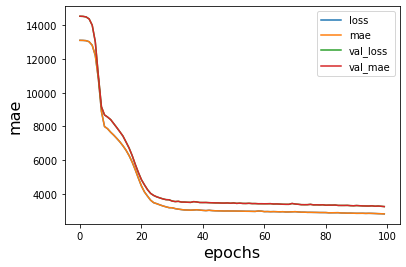

In [18]:
hist.plot()
plt.xlabel('epochs', fontsize=16)
plt.ylabel('mae', fontsize=16)
plt.show()

### Making predictions

In [19]:
model.predict(X_test_tensors[:5]), y_test_tensors[:5]

(array([[ 1134.5   ],
        [ 3282.1736],
        [ 5700.604 ],
        [13316.157 ],
        [ 9276.706 ]], dtype=float32),
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([ 1136.3994, 24059.68  ,  5662.225 , 13228.847 ,  9225.257 ],
       dtype=float32)>)

> This is one of my best ``regression`` model ever using NN in ``tensorflow``